In [4]:
%matplotlib notebook 
# Import modules
import numpy as np
import matplotlib.pyplot
from pyne import serpent
from pyne import nucname
from scipy.stats.stats import pearsonr 
import itertools
#matplotlib.pyplot.rcParams["font.family"] = "Times New Roman"
#matplotlib.pyplot.rcParams["font.size"] = 14

# MSFR parameters
vol_fuel_se = 18.0E+6
vol_blank_se = 7.3E+6

dep0 = serpent.parse_dep('/home/andrei2/Desktop/git/fs-msrs/msfr/serpent/no_repr_depletion/msfr_depl.inp_dep.m', make_mats=False)
depu = serpent.parse_dep('/home/andrei2/Desktop/git/fs-msrs/msfr/serpent/no_repr_depletion/unit_cell_depl/msfr_depl.inp_dep.m', make_mats=False)

res0 = serpent.parse_res('/home/andrei2/Desktop/git/fs-msrs/msfr/serpent/no_repr_depletion/msfr_depl.inp_res.m')
resu = serpent.parse_res('/home/andrei2/Desktop/git/fs-msrs/msfr/serpent/no_repr_depletion/unit_cell_depl/msfr_depl.inp_res.m')

days = dep0['DAYS']                             # Time array parsed from *_dep.m file
step = days[-1] - days[-2]
n_se    = dep0['NAMES'][0].split()                 # Names of isotopes parsed from *_dep.m file
EOC = np.amax(days)                             # End of cycle (simulation time length)
total_mass_list = dep0['TOT_MASS']
adens_fuel_se      = dep0['MAT_fuel_ADENS']        # atomic density for each isotope in material 'fuel'
mdens_fuel_se      = dep0['MAT_fuel_MDENS']        # mass density for each isotope in material 'fuel'
#vol_fuel_se        = dep0['MAT_fuel_VOLUME']       # total volume of material 'fuel'
adens_blank_se     = dep0['MAT_blank_ADENS']       # atomic density for each isotope in material 'blank'
mdens_blank_se     = dep0['MAT_blank_MDENS']       # mass density for each isotope in material 'blank'
#vol_blank_se       = dep0['MAT_blank_VOLUME']      # total volume of material 'blank'
# SCALE output 
filename_fuel  = '/home/andrei2/Desktop/ornl/msfr/scale/no_reproc_depl/510efpd/anl425/quarter_cell2.000000000000000000.plt'
filename_blank = '/home/andrei2/Desktop/ornl/msfr/scale/no_reproc_depl/510efpd/anl425/quarter_cell2.000000000000000001.plt'
#print (dep0.keys())
#print (adens_fuel)
#print (n.index('Th232'))

# Full-core
iso_mass_f_drive = dep0['MAT_fuel_MDENS'] * vol_fuel_se
iso_mass_f_blank = dep0['MAT_blank_MDENS'] * vol_blank_se

# Unit cell
iso_mass_u_drive = depu['MAT_fuel_MDENS'] * vol_fuel_se
iso_mass_u_blank = depu['MAT_blank_MDENS'] * vol_blank_se

print( iso_mass_f_drive[n_se.index('U233')] )
print( iso_mass_u_drive[n_se.index('U233')] )
print( iso_mass_f_blank[n_se.index('Th232')] )
print( iso_mass_u_blank[n_se.index('Th232')] )

def read_scale_out (filename):
    iso       = []
    adens     = []
    days_list = []
    with open(filename,'r') as infile:
        for line in itertools.islice(infile, 5, None):  # Skip file header start=6, stop=None
            p = line.split()
            iso.append(str(p[0]))
            adens.append(p[1:])  
            #iso.append(str(p[2]))
            #adens.append(str(p[3]))
    #u_en = 1e-6* np.flip (np.array (upp_enrg, dtype=float), 0 )               # Convert eV to MeV
    #flux = np.flip ( np.array (flux_list, dtype=float), 0 )
    #num_gr = len (u_en)
    days_list.append (iso[0])
    days_list = days_list + adens[0][:]
    adens_arr = np.asarray(adens[1:][:], dtype=np.float32)
    days = np.array (days_list, dtype=np.float32)
    return iso[1:], days, adens_arr


[ 5074992.  4924386.  4892364.  4885488.  4882896.  4879980.  4875750.
  4870098.  4863060.  4854690.  4845096.  4834332.  4822452.  4809492.
  4795542.  4780638.  4764870.  4748256.  4730832.]
[ 5074992.  4924026.  4891230.  4883490.  4880106.  4876524.  4871700.
  4865454.  4857858.  4848930.  4838796.  4827510.  4815090.  4801644.
  4787226.  4771854.  4755564.  4738464.  4720572.]
[ 17570954.  17541681.  17511605.  17481237.  17450504.  17419406.
  17387870.  17356115.  17323995.  17291583.  17258879.  17225810.
  17192449.  17158723.  17124559.  17090103.  17055209.  17020023.
  16984472.]
[ 17570954.  17545696.  17520073.  17494377.  17468681.  17443058.
  17417435.  17391739.  17366116.  17340493.  17314797.  17289101.
  17263332.  17237636.  17211794.  17185879.  17160037.  17134122.
  17108134.]


[    0.    60.   120.   180.   240.   300.   360.   420.   480.   540.
   600.   660.   720.   780.   840.   900.   960.  1020.  1080.]
(1168, 19)
(1168, 19)
[ 0.999377  0.973477  0.967195  0.964945  0.963583  0.962454  0.961051
  0.95992   0.958789  0.957464  0.955965  0.954603  0.953194  0.95156
  0.950146  0.948604  0.94672   0.945036  0.943182] [  7.20000000e-05   7.70000000e-05   7.10000000e-05   6.90000000e-05
   7.70000000e-05   6.90000000e-05   7.30000000e-05   7.10000000e-05
   6.70000000e-05   7.10000000e-05   7.30000000e-05   6.50000000e-05
   6.80000000e-05   6.90000000e-05   6.90000000e-05   6.60000000e-05
   6.80000000e-05   6.50000000e-05   6.80000000e-05]
[ 0.99927   0.973245  0.967065  0.96514   0.963626  0.961993  0.960775
  0.95947   0.95859   0.957113  0.955248  0.953835  0.952829  0.951039
  0.949243  0.947437  0.945783  0.944117  0.941927] [ 0.00019  0.00021  0.00021  0.0002   0.00019  0.00019  0.00019  0.00019
  0.00019  0.00019  0.00021  0.0002   0.0002   0.0001

/home/andrei2/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: RuntimeWarning: invalid value encountered in true_divide
/home/andrei2/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in true_divide
/home/andrei2/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


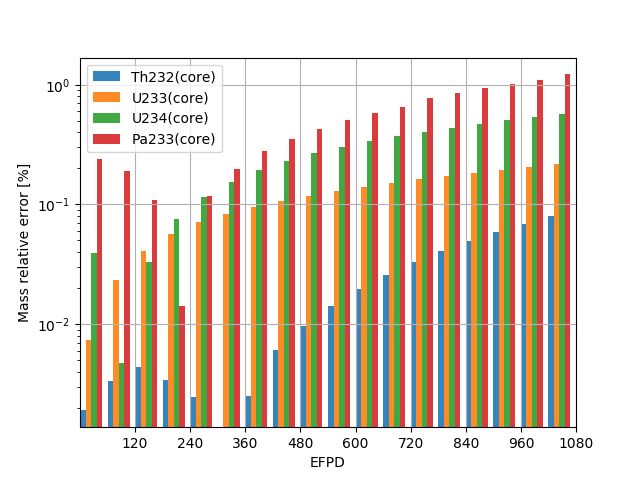

Sr90
0.11496294
0.643981443063
Y89
0.1035486
0.590331496515
Zr91
0.10742598
0.574386195965
Zr92
0.12337452
0.643114964095
Zr93
0.12788964
0.62012841697
Zr94
0.13178052
0.65413309949
Zr96
0.11012688
0.633196908875
Mo97
0.1015506
0.599641951894
Mo98
0.10474128
0.669535449634
Xe132
0.13113648
0.718976138448
Xe134
0.16875558
0.636992270122
Xe136
0.2110608
0.637067612745
Cs133
0.14040666
0.546897134367
Cs135
0.1452663
0.612860656601
Cs137
0.16666326
0.642613135012
Ba138
0.17008776
0.64068102255
La139
0.16099776
0.630232370935
Ce140
0.17913708
0.631427061332
Ce142
0.1933488
0.639569524093
Pr141
0.16344288
0.574769607584
Th232
32.98842
0.0807556106052
Pa233
0.17266554
1.22407748529
U233
4.730832
0.216875171217
U234
0.6971778
0.571360705978
Nd143
0.16568964
0.624661867815

Absolute error (driver)
Xe134
Mass, g: 168755.58
Error:1074.96
Xe136
Mass, g: 211060.8
Error:1344.6
Cs137
Mass, g: 166663.26
Error:1071.0
Ba138
Mass, g: 170087.76
Error:1089.72
La139
Mass, g: 160997.76
Error:1014.66
Ce140
Ma

In [5]:
#matplotlib.pyplot.rcParams["font.family"] = "Times New Roman"

iso_plt = ['Th232','U233','U234','Pa233']

print(days)
print(iso_mass_f_drive.shape)
print(iso_mass_u_drive.shape)

# Mass defect full vs unit
m_err_drive = 100*abs(iso_mass_f_drive - iso_mass_u_drive) / iso_mass_f_drive
m_err_blank = 100*abs(iso_mass_f_blank - iso_mass_u_blank) / iso_mass_f_blank
m_err_tot = 100*abs((iso_mass_f_drive+iso_mass_f_blank)-(iso_mass_u_drive+iso_mass_u_blank) )/ (iso_mass_f_drive+iso_mass_f_blank)

# Keff
kef_f = res0['IMP_KEFF'][:,0]
kef_f_std = res0['IMP_KEFF'][:,1]
kef_u = resu['IMP_KEFF'][:,0]
kef_u_std = resu['IMP_KEFF'][:,1]

print (kef_f, kef_f_std)
print (kef_u, kef_u_std)

# Initialize figure
fig_1 = matplotlib.pyplot.figure(1)
ax = fig_1.add_subplot(111)
ax.grid(True)
#ax.ticklabel_format (style='sci',scilimits=(0,0),axis='y')
#ax.set_ylim(0,0.00555)
ax.set_xlim(0,max(days))
plot_title = "Relative error in isotope mass for full-core vs unit cell \n"+"over 510 EFPD of operation"
s = 0
ax.bar(days-1*step, m_err_drive[n_se.index(iso_plt[0])], width=12, alpha=0.9, align='edge', label=iso_plt[0] + '(core)')
ax.bar(days-3/4*step-3, m_err_drive[n_se.index(iso_plt[1])], width=12, alpha=0.9,align='edge',label=iso_plt[1] + '(core)')
ax.bar(days-2/4*step-6, m_err_drive[n_se.index(iso_plt[2])], width=12, alpha=0.9,align='edge',label=iso_plt[2] + '(core)')
ax.bar(days-1/4*step-9, m_err_drive[n_se.index(iso_plt[3])], width=12, alpha=0.9,align='edge',label=iso_plt[3] + '(core)')
    #ax.bar(days, m_err_blank[n_se.index(k)], width=-27.0, color='#E84A27',color='#0455A4', align='edge',label=k + '(blanket)')
    #ax.plot(days, iso_mass_f_drive[n_se.index(k)], label=k + '(Full-core)')
    #ax.plot(days, iso_mass_u_drive[n_se.index(k)], label=k + '(Full-core)')
ax.legend(loc=0)
ax.set_ylabel('Mass relative error [%]')
ax.set_yscale('log')
ax.set_xticks([120,240,360,480,600,720,840,960,1080])
ax.set_xlabel('EFPD')
#ax.set_title(plot_title)
#ax.text(0.95, 0.5, 'Breeding gain  '+"{0:.1f}".format(gain_rate)+ ' kg/year', 
#        horizontalalignment='right',verticalalignment='center', transform=ax.transAxes)
#ax.text(0.95, 0.45, 'Breeding gain coeff  '+"{0:.4f}".format((tot_mass_sc[-1] - tot_mass_sc[0])/(tot_mass_sc[0])), 
#        horizontalalignment='right',verticalalignment='center', transform=ax.transAxes)
#ax.set_xlim([0,np.amax(days)])
fig_1.show()
#fig_1.savefig(str(iso)+'__anl230v71.png',format='png')


# For driver
for i in range(m_err_drive.shape[0]):
    if iso_mass_f_drive[i,-1] > 1e+5 and m_err_drive[i,-1] > 1e-2:
        print(n_se[i])
        print (1e-6*iso_mass_f_drive[i,-1])
        print(m_err_drive[i,-1])

print('\nAbsolute error (driver)')        
for i in range(m_err_drive.shape[0]):        
    if abs(iso_mass_f_drive[i,-1]-iso_mass_u_drive[i,-1]) > 1000:
        print(n_se[i])
        print ('Mass, g: '+str(iso_mass_f_drive[i,-1]) )
        print ('Error:' +str(abs(iso_mass_f_drive[i,-1]-iso_mass_u_drive[i,-1])))
        
# For blanket
print ('\n\nBlanket')
for i in range(m_err_blank.shape[0]):
    if iso_mass_f_blank[i,-1] > 1e+4:# and m_err_blank[i,-1] > 0.1:
        print(n_se[i])
        print (1e-6*iso_mass_f_blank[i,-1])
        print(m_err_blank[i,-1])
print('\nAbsolute error (blanket)')        
for i in range(m_err_blank.shape[0]):        
    if abs(iso_mass_f_blank[i,-1]-iso_mass_u_blank[i,-1]) > 1000:
        print(n_se[i])
        print ('Mass, g: '+str(iso_mass_f_blank[i,-1]) )
        print ('Error:' +str(abs(iso_mass_f_blank[i,-1]-iso_mass_u_blank[i,-1])))

<IPython.core.display.Javascript object>


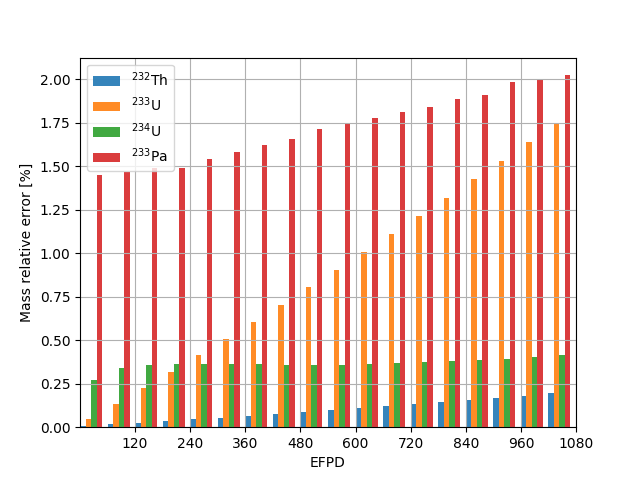

In [9]:
#matplotlib.pyplot.rcParams["font.family"] = "Times New Roman"
#matplotlib.pyplot.rcParams["font.size"] = 12

iso_plt = ['Th232','U233','U234','Pa233']

# Initialize figure for blanket
fig_2 = matplotlib.pyplot.figure(2)
ax = fig_2.add_subplot(111)
ax.grid(True)
#ax.ticklabel_format (style='sci',scilimits=(0,0),axis='y')
#ax.set_ylim(0,0.00555)
ax.set_xlim(0,max(days))
ax.bar(days-1*step, m_err_tot[n_se.index(iso_plt[0])], width=12, alpha=0.9, align='edge', label=r'$^{232}$Th')
ax.bar(days-3/4*step-3, m_err_tot[n_se.index(iso_plt[1])], width=12, alpha=0.9,align='edge',label=r'$^{233}$U')
ax.bar(days-2/4*step-6, m_err_tot[n_se.index(iso_plt[2])], width=12, alpha=0.9,align='edge',label=r'$^{234}$U')
ax.bar(days-1/4*step-9, m_err_tot[n_se.index(iso_plt[3])], width=12, alpha=0.9,align='edge',label=r'$^{233}$Pa')
    #ax.bar(days, m_err_blank[n_se.index(k)], width=-27.0, color='#E84A27',color='#0455A4', align='edge',label=k + '(blanket)')
    #ax.plot(days, iso_mass_f_drive[n_se.index(k)], label=k + '(Full-core)')
    #ax.plot(days, iso_mass_u_drive[n_se.index(k)], label=k + '(Full-core)')
ax.legend(loc=0)
ax.set_ylabel('Mass relative error [%]')
#ax.set_yscale('log')
ax.set_xticks([120,240,360,480,600,720,840,960,1080])
ax.set_xlabel('EFPD')
#ax.set_title(plot_title)
#ax.text(0.95, 0.5, 'Breeding gain  '+"{0:.1f}".format(gain_rate)+ ' kg/year', 
#        horizontalalignment='right',verticalalignment='center', transform=ax.transAxes)
#ax.text(0.95, 0.45, 'Breeding gain coeff  '+"{0:.4f}".format((tot_mass_sc[-1] - tot_mass_sc[0])/(tot_mass_sc[0])), 
#        horizontalalignment='right',verticalalignment='center', transform=ax.transAxes)
#ax.set_xlim([0,np.amax(days)])
fig_2.show()
#fig_2.savefig('/home/andrei2/Desktop/git/publications/2019-rykhl-fsmsrs-mc/Figures/msfr_depl_f_vs_u.png',bbox_inches='tight', dpi=700)


# Unit cell vs Full-core for REBUS-370

In [22]:
# REBUS parameters
vol_fuel_se = 200.0E+6/3.6

dep0 = serpent.parse_dep('/home/andrei2/Desktop/git/fs-msrs/rebus/serpent/no_repr_depl/rebus_depl.inp_dep.m', make_mats=False)
depu = serpent.parse_dep('/home/andrei2/Desktop/git/fs-msrs/rebus/serpent/no_repr_depl/unit_cell/rebus_depl.inp_dep.m', make_mats=False)

days    = dep0['DAYS']                             # Time array parsed from *_dep.m file
n_se    = dep0['NAMES'][0].split()                 # Names of isotopes parsed from *_dep.m file
# Full-core
iso_mass_f_drive = dep0['MAT_fuel_MDENS'] * vol_fuel_se
# Unit cell
iso_mass_u_drive = depu['MAT_fuel_MDENS'] * vol_fuel_se

# Mass defect full vs unit
m_err = 100*abs(iso_mass_f_drive - iso_mass_u_drive) / iso_mass_f_drive

# For driver
for i in range(m_err.shape[0]):
    if iso_mass_f_drive[i,-1] > 1e+6 and m_err[i,-1] > 1e-2:
        print(n_se[i])
        print (1e-6*iso_mass_f_drive[i,-1])
        print(m_err[i,-1])

print('\nAbsolute error (driver)')        
for i in range(m_err.shape[0]):        
    if abs(iso_mass_f_drive[i,-1]-iso_mass_u_drive[i,-1]) > 1000:
        print(n_se[i])
        print ('Mass, g: '+str(iso_mass_f_drive[i,-1]) )
        print ('Error:' +str(abs(iso_mass_f_drive[i,-1]-iso_mass_u_drive[i,-1])))


U238
90.9377777778
0.184497336396
Pu239
9.58961111111
0.61409047986
Pu240
4.24103333333
2.28075966811
Pu241
1.21525
0.426066881529
Pu242
1.21761111111
0.739608523064

Absolute error (driver)
S32
Mass, g: 13023.2777778
Error:1322.22222222
Cl35
Mass, g: 53449944.4444
Error:4277.77777778
Sm149
Mass, g: 30966.8888889
Error:1035.83333333
U235
Mass, g: 500411.111111
Error:12442.7777778
U236
Mass, g: 38714.9444444
Error:5212.66666667
U238
Mass, g: 90937777.7778
Error:167777.777778
Np237
Mass, g: 742061.111111
Error:19011.1111111
Pu238
Mass, g: 559888.888889
Error:27900.0
Pu239
Mass, g: 9589611.11111
Error:58888.8888889
Pu240
Mass, g: 4241033.33333
Error:96727.7777778
Pu241
Mass, g: 1215250.0
Error:5177.77777778
Pu242
Mass, g: 1217611.11111
Error:9005.55555556
Am241
Mass, g: 932916.666667
Error:19788.8888889
Am242m
Mass, g: 15101.5
Error:1297.38888889
Am243
Mass, g: 286730.555556
Error:3708.33333333
Cm242
Mass, g: 35487.5
Error:3432.38888889
Cm244
Mass, g: 108501.111111
Error:6514.44444444
Cm2

/home/andrei2/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:15: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


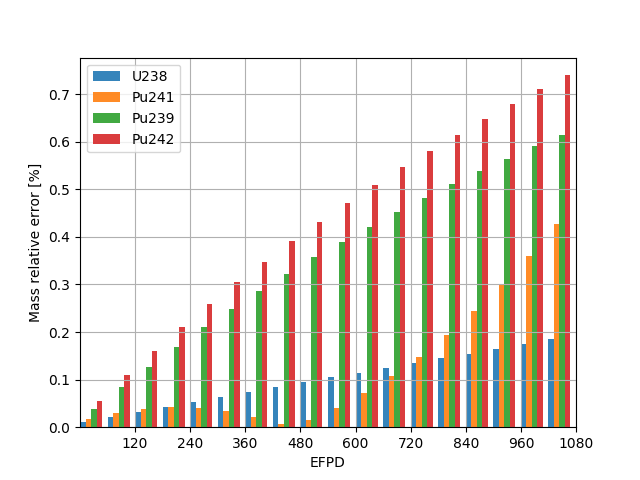

In [25]:
iso_plt = ['U238','Pu241','Pu239','Pu242']

# Initialize figure for blanket
fig_3 = matplotlib.pyplot.figure(3)
ax = fig_3.add_subplot(111)
ax.grid(True)
#ax.ticklabel_format (style='sci',scilimits=(0,0),axis='y')
#ax.set_ylim(0,0.00555)
ax.set_xlim(0,max(days))
ax.bar(days-1*step, m_err[n_se.index(iso_plt[0])], width=12, alpha=0.9, align='edge', label=iso_plt[0])#label=r'$^{232}$Th')
ax.bar(days-3/4*step-3, m_err[n_se.index(iso_plt[1])], width=12, alpha=0.9,align='edge',label=iso_plt[1])#label=r'$^{233}$U')
ax.bar(days-2/4*step-6, m_err[n_se.index(iso_plt[2])], width=12, alpha=0.9,align='edge',label=iso_plt[2])#label=r'$^{234}$U')
ax.bar(days-1/4*step-9, m_err[n_se.index(iso_plt[3])], width=12, alpha=0.9,align='edge',label=iso_plt[3])#label=r'$^{233}$Pa')
    #ax.bar(days, m_err_blank[n_se.index(k)], width=-27.0, color='#E84A27',color='#0455A4', align='edge',label=k + '(blanket)')
    #ax.plot(days, iso_mass_f_drive[n_se.index(k)], label=k + '(Full-core)')
    #ax.plot(days, iso_mass_u_drive[n_se.index(k)], label=k + '(Full-core)')
ax.legend(loc=0)
ax.set_ylabel('Mass relative error [%]')
#ax.set_yscale('log')
ax.set_xticks([120,240,360,480,600,720,840,960,1080])
ax.set_xlabel('EFPD')
#ax.set_title(plot_title)
#ax.text(0.95, 0.5, 'Breeding gain  '+"{0:.1f}".format(gain_rate)+ ' kg/year', 
#        horizontalalignment='right',verticalalignment='center', transform=ax.transAxes)
#ax.text(0.95, 0.45, 'Breeding gain coeff  '+"{0:.4f}".format((tot_mass_sc[-1] - tot_mass_sc[0])/(tot_mass_sc[0])), 
#        horizontalalignment='right',verticalalignment='center', transform=ax.transAxes)
#ax.set_xlim([0,np.amax(days)])
fig_3.show()
#fig_3.savefig('/home/andrei2/Desktop/git/publications/2019-rykhl-fsmsrs-mc/Figures/rebus_depl_f_vs_u.png',bbox_inches='tight', dpi=700)
